# Clustering and Manifold Learning

## Task 2
> Follow the examples in the notebook Lab 3 - Clustering and Manifold Learning.ipynb to cluster the loans_train dataset after it has been prepared for ML (i.e. the result of the example notebook for e-tivity 2). Use the k-Means clustering algorithm and visualise the clustering. Pick a value of k suggested by the MDS and t-SNE visualisations of the dataset. Experiment with various values of the parameters of k-Means. Aim at producing a meaningful clustering that allows you to describe the clusters with words. Write a short conclusion about the characteristics of the clusters.

### A. Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.preprocessing import RobustScaler #need for scaling attributes with outliers
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
df= pd.read_csv("C:\\Users\\Paul\\Dropbox (Personal)\\College\\Year2\\4CT5157\\Week3/loans_train_prepared.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
0,0.000000,1.084523,1.058140,0.750,1.0,1,0,0,0,0,0,0,0,1,1,0.841086
1,0.333333,0.925883,1.047319,0.750,1.0,1,0,1,0,0,0,0,0,0,0,0.871711
2,0.000000,0.683858,0.635920,0.750,1.0,1,0,1,0,1,0,0,0,1,1,0.385189
3,0.000000,0.608992,1.002824,0.750,1.0,1,0,1,0,0,0,1,0,1,1,0.717012
4,0.000000,1.101869,1.115650,0.750,1.0,1,0,0,0,0,0,0,0,1,1,0.860305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.000000,0.666409,0.676143,0.750,1.0,0,0,0,0,0,0,0,0,0,1,0.364708
610,1.000000,0.858916,0.395858,0.375,1.0,1,0,1,0,0,0,0,0,0,1,0.587496
611,0.333333,1.313719,1.566110,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.116075
612,0.666667,1.267616,1.325676,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.042256


### B. Rescale the Data

In [3]:
# I rescaled the dataframe to [0,1] using MinMaxScaler
# I originally made a numpy array from the dataframe (as in the lab3 example) but found the clustering, elbow method
# and silhouette method more defined with the dataframe so stuck with that; I couldn't understand why they would be different

min_max_scaler = preprocessing.MinMaxScaler()
df[['Dependents','ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Gender_Male','Gender_nan',
    'Married_Yes','Married_nan','Self_Employed_Yes','Self_Employed_nan','Education_Not Graduate',
    'Property_Area_Semiurban','Property_Area_Urban','Loan_Status_Y','TotalIncome']] = min_max_scaler.fit_transform(df[['Dependents','ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Gender_Male','Gender_nan',
    'Married_Yes','Married_nan','Self_Employed_Yes','Self_Employed_nan','Education_Not Graduate',
    'Property_Area_Semiurban','Property_Area_Urban','Loan_Status_Y','TotalIncome']])
df

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
0,0.000000,0.322081,0.428772,0.743590,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.260947
1,0.333333,0.274766,0.424366,0.743590,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.270512
2,0.000000,0.202582,0.256866,0.743590,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.118557
3,0.000000,0.180252,0.406250,0.743590,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.222195
4,0.000000,0.327255,0.452187,0.743590,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.266949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.000000,0.197377,0.273243,0.743590,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.112160
610,1.000000,0.254793,0.159126,0.358974,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.181743
611,0.333333,0.390440,0.635590,0.743590,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.346834
612,0.666667,0.376690,0.537698,0.743590,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.323778


### C. Scatterplot Function (to be used below for visualising a clustering)

In [4]:
colors = np.array(['orange', 'blue', 'lime', 'pink', 'green', 'purple','yellow', 'purple','brown', 'khaki'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):  
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### D. K-Means Clustering

In [5]:
# Run k-Means
# Number of clusters k; assume 3 to begin with
k = 3
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(df.values)

### E. Apply a manifold-learning technique to project the data set to a 2D space

In [6]:
# Append the cluster centers to the dataset.

data_and_centers = np.r_[df.values,clustered_data_sklearn.cluster_centers_]


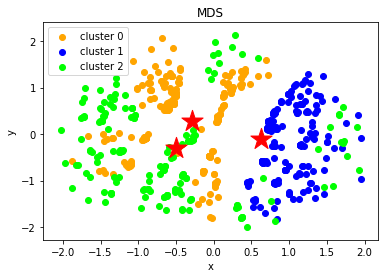

In [7]:
# Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space
# Project both the data and the k-Means cluster centers to 2D.
# Plot the transformed examples and the centers.

XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:],
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

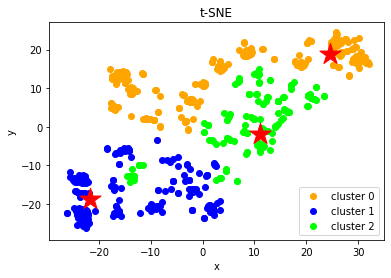

In [8]:
# Apply multi-dimensional scaling (t-SNE) to project both the data and the k-Means cluster centers to a 2D space
# Project both the data and the k-Means cluster centers to 2D.
# Plot the transformed examples and the centers.

XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:],
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='t-SNE')

### F. Cluster Analysis

In [9]:
# Add the cluster labels as an extra column in the original dataframe

df['cluster1'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)
df

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster1
0,0.000000,0.322081,0.428772,0.743590,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.260947,0
1,0.333333,0.274766,0.424366,0.743590,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.270512,2
2,0.000000,0.202582,0.256866,0.743590,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.118557,0
3,0.000000,0.180252,0.406250,0.743590,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.222195,0
4,0.000000,0.327255,0.452187,0.743590,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.266949,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.000000,0.197377,0.273243,0.743590,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.112160,0
610,1.000000,0.254793,0.159126,0.358974,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.181743,0
611,0.333333,0.390440,0.635590,0.743590,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.346834,0
612,0.666667,0.376690,0.537698,0.743590,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.323778,0


In [10]:
# Compute the mean value of each attribute for each cluster

df.groupby('cluster1').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster1,,,,,,,,,,,,,,,,
0,0.260631,0.273629,0.433693,0.693996,0.987654,0.847737,0.016461,0.674897,0.004115,0.127572,0.061728,0.193416,0.000000,0.547325,1.000000,0.269855
1,0.239936,0.275577,0.437600,0.712994,0.980676,0.748792,0.019324,0.652174,0.009662,0.144928,0.043478,0.198068,1.000000,0.000000,0.864734,0.269243
2,0.239837,0.265049,0.437900,0.714978,0.500000,0.780488,0.030488,0.603659,0.000000,0.128049,0.048780,0.280488,0.158537,0.420732,0.000000,0.262532


### Description of the clusters:
>Cluster 0 - Have had their loan applications accepted and do not live in a semi-urban area.  Almost all have a credit history and compared to the other clusters they are the most likely to be male.<br><br>
>Cluster 1 - Live in a semi-urban area and mostly have had their loan applications accepted and have a credit history.  Compared to other clusters they are the least likely to be male.<br><br>
>Cluster 2 - Have had their loan applications rejected with only half having a credit history.  Compared to the other clusters they are least likely to be married but most likely to be graduates.

## Task 3
> Plot the sum of squared distances from the data points to the centers of the k-Means clusters for various values of k. Use the Elbow method to pick the best value of k. If it suggests a different value of k (from the one you used in Task 2), then compute a new k-Means clustering.

In [11]:
# Load the dataset

df2= pd.read_csv("C:\\Users\\Paul\\Dropbox (Personal)\\College\\Year2\\4CT5157\\Week3/loans_train_prepared.csv")
df2.drop('Unnamed: 0', axis=1, inplace=True)
df2

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
0,0.000000,1.084523,1.058140,0.750,1.0,1,0,0,0,0,0,0,0,1,1,0.841086
1,0.333333,0.925883,1.047319,0.750,1.0,1,0,1,0,0,0,0,0,0,0,0.871711
2,0.000000,0.683858,0.635920,0.750,1.0,1,0,1,0,1,0,0,0,1,1,0.385189
3,0.000000,0.608992,1.002824,0.750,1.0,1,0,1,0,0,0,1,0,1,1,0.717012
4,0.000000,1.101869,1.115650,0.750,1.0,1,0,0,0,0,0,0,0,1,1,0.860305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.000000,0.666409,0.676143,0.750,1.0,0,0,0,0,0,0,0,0,0,1,0.364708
610,1.000000,0.858916,0.395858,0.375,1.0,1,0,1,0,0,0,0,0,0,1,0.587496
611,0.333333,1.313719,1.566110,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.116075
612,0.666667,1.267616,1.325676,0.750,1.0,1,0,1,0,0,0,0,0,1,1,1.042256


In [12]:
# rescale to [0,1] using MinMaxScaler

df2[['Dependents','ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Gender_Male','Gender_nan',
    'Married_Yes','Married_nan','Self_Employed_Yes','Self_Employed_nan','Education_Not Graduate',
    'Property_Area_Semiurban','Property_Area_Urban','Loan_Status_Y','TotalIncome']] = min_max_scaler.fit_transform(df2[['Dependents','ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Gender_Male','Gender_nan',
    'Married_Yes','Married_nan','Self_Employed_Yes','Self_Employed_nan','Education_Not Graduate',
    'Property_Area_Semiurban','Property_Area_Urban','Loan_Status_Y','TotalIncome']])
df2

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
0,0.000000,0.322081,0.428772,0.743590,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.260947
1,0.333333,0.274766,0.424366,0.743590,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.270512
2,0.000000,0.202582,0.256866,0.743590,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.118557
3,0.000000,0.180252,0.406250,0.743590,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.222195
4,0.000000,0.327255,0.452187,0.743590,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.266949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.000000,0.197377,0.273243,0.743590,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.112160
610,1.000000,0.254793,0.159126,0.358974,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.181743
611,0.333333,0.390440,0.635590,0.743590,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.346834
612,0.666667,0.376690,0.537698,0.743590,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.323778


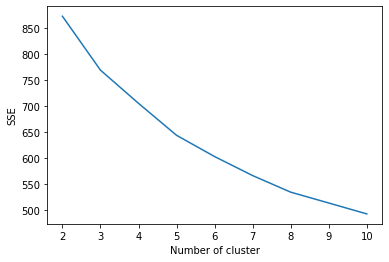

In [13]:
# Use Elbow methods to determine value of k, adapted from Prakash (2018)
# In general we are looking for the n_cluster (k) at the elbow of the arm in the Elbow method

sse = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df2.values)
    df2["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [14]:
# Drop the attribute 'clusters'
df2.drop('clusters', axis=1, inplace=True)

In [15]:
# Use Silhouette Coefficient methods to determine value of k, adapted from Prakash (2018)
# In general we are looking for the n_cluster (k) with the largest Silhouette Coefficient 
# subject to the amount of known clusters (unknown in this case)

from sklearn.metrics import silhouette_score
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(df2.values)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df2.values, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.18654028465358852
For n_clusters=3, The Silhouette Coefficient is 0.19154952618794235
For n_clusters=4, The Silhouette Coefficient is 0.19406643975772064
For n_clusters=5, The Silhouette Coefficient is 0.20533587388405364
For n_clusters=6, The Silhouette Coefficient is 0.20108961259038974
For n_clusters=7, The Silhouette Coefficient is 0.20227428125950178
For n_clusters=8, The Silhouette Coefficient is 0.21544720160529846
For n_clusters=9, The Silhouette Coefficient is 0.2253799201573829
For n_clusters=10, The Silhouette Coefficient is 0.21747122580755307


It is unclear where the value of k is from the elbow method, maybe 3, 5 or 8<br>
The Silhouette method is increasing with k which is not providing any direction

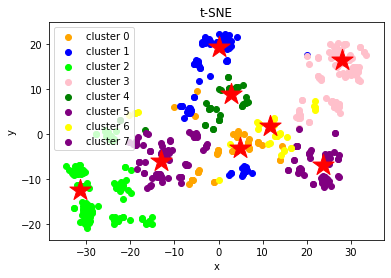

In [16]:
# Apply multi-dimensional scaling (t-SNE) to project both the data and the k-Means cluster centers to a 2D space
# Project both the data and the k-Means cluster centers to 2D.
# Plot the transformed examples and the centers with k=8

k = 8
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(df2.values)
data_and_centers = np.r_[df2.values,clustered_data_sklearn.cluster_centers_]
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='t-SNE')

In [17]:
# Add the new cluster labels as an extra column in the original dataframe

df2['cluster2'] = pd.Series(clustered_data_sklearn.labels_, index=df2.index)

# Compute the mean value of each attribute for each cluster

df2.groupby('cluster2').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster2,,,,,,,,,,,,,,,,
0,0.300000,0.294734,0.462154,0.725641,0.140000,0.820000,0.040000,0.460000,0.000000,0.180000,0.020000,0.000000,0.420000,0.060000,0.020000,0.281953
1,0.266667,0.290004,0.473362,0.697721,0.988889,0.944444,0.033333,0.811111,0.000000,0.166667,0.055556,0.000000,0.000000,0.000000,0.811111,0.305914
2,0.303030,0.273291,0.454298,0.710956,0.984848,0.840909,0.015152,1.000000,0.000000,0.128788,0.030303,0.159091,1.000000,0.000000,0.916667,0.279645
3,0.364486,0.281645,0.448635,0.678409,0.990654,0.953271,0.018692,1.000000,0.000000,0.102804,0.065421,0.158879,0.000000,1.000000,0.859813,0.283652
4,0.271318,0.243775,0.395462,0.737627,1.000000,0.860465,0.000000,0.627907,0.000000,0.116279,0.093023,1.000000,0.069767,0.000000,0.604651,0.217336
5,0.063291,0.248834,0.382109,0.727361,0.949367,0.468354,0.012658,0.012658,0.012658,0.101266,0.075949,0.075949,0.000000,0.810127,0.645570,0.227909
6,0.235772,0.237356,0.428802,0.671670,0.121951,0.853659,0.024390,0.853659,0.000000,0.121951,0.000000,0.731707,0.121951,0.682927,0.000000,0.245815
7,0.111111,0.278959,0.407393,0.711895,0.972222,0.569444,0.027778,0.000000,0.027778,0.166667,0.069444,0.236111,1.000000,0.000000,0.805556,0.250567


### Description of the clusters:
>Cluster 0 – Are not graduates.  They mostly have had their loan application rejected and have no credit history.<br><br>
>Cluster 1 -Are not graduates and live in a rural area.  They mostly have had their loan applications accepted, have a credit history and are married males.<br><br>
>Cluster 2 -Are married and live in a Semi-urban area. They mostly have had their loan applications accepted, have a credit history and are males.<br><br>
>Cluster 3 -Are married and live in an Urban area. They mostly have had their loan applications accepted, have a credit history and are males.<br><br>
>Cluster 4 -Are graduates with a credit history. They are mostly male and just over half have had their loan applications accepted and are married.<br><br>
>Cluster 5 – Do not live in a Semi-urban area and mostly live in an urban area.  They are mostly single with a credit history.  Just over half have had their loan applications accepted and are females.<br><br>
>Cluster 6 – Have had their loan applications rejected.  They are mostly male, married and living in an urban area that have no credit history and are not graduates <br><br>
>Cluster 7 – Live in a Semi-urban area and are single. The mostly have had their loan applications accepted, are graduates and have a credit history.  Just over half are male.


# Task 4
> Apply another clustering algorithm (from the ones available in scikit-learn) to the same dataset and an appropriate manifold-learning technique to visualise the clustering.


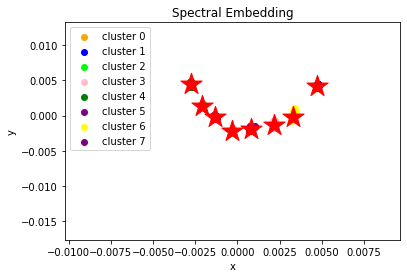

In [18]:
# With k = 8 I try an alternative clustering alorithm called Spectral Embedding and visualise with the clustering scatterplot

k = 8
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(df2.values)
data_and_centers = np.r_[df2.values,clustered_data_sklearn.cluster_centers_]
XYcoordinates = manifold.SpectralEmbedding(n_components=2, affinity='rbf').fit_transform(data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='Spectral Embedding')

I don't think that Specural Embedding brings any additional informaton that we did not see with MDS or t-SNE

### Conclusions/Comments:
> I found it unususal that there was a difference in the analysis between using the dataframe and numpy array<br>
> The MinMaxScaler applied to the numpy array did not reduce and attirute scales to [0,1]<br>
> If I ran the clustering again it changed the groups and my descriptions were not longer relevant; this caused a lot of<br>
rewritting for large values of k<br>
> I found tha the elbow and silhoutte method graphs would change the more times I ran them so only ran them once<br>
> There may be errors in my coding that causes the silhoutte graph to keep increasing with k and for the elbow method<br>
not to produce a definitive k

### Reference List:
> Maheshwari, K. (2020) ‘Scikit Learn - K-Means - Elbow - criterion’, stackoverflow,
    29 Jan, available: https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion 
    [accessed 29 Mar 2020]